# Advance Regression For House Price Prediction

#### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. 
The company uses data analytics to purchase houses at a price below their actual values and 
flip them on at a higher price. For the same purpose, the company has collected a data set 
from the sale of houses in Australia. 
The company is looking at prospective properties to buy to enter the market. 
We are required to build a regression model using regularisation in order to 
predict the actual value of the prospective properties and decide whether to invest in them or not.


#### The company wants to know:

* Which variables are significant in predicting the price of a house, and
* How well those variables describe the price of a house.
* Also, determine the optimal value of lambda for ridge and lasso regression.

#### Business Goal
We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# Step 1: Data Understanding and exploration : Reading and Understanding the Data
Let us first import NumPy and Pandas and read the dataset

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import os
from sklearn.metrics import r2_score

from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Supress warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

%matplotlib inline

In [2]:
#Importing dataset
housing_data = pd.read_csv('train.csv')

In [3]:
# Checking first few rows
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Checking feature names in the dataset
housing_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
  

In [5]:
# Let's look at the number of rows and columns in the dataset
housing_data.shape

#Dataset has 1460 rows x 81 columns

(1460, 81)

In [6]:
#checking for null values & datatypes of columns
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
#Checking Statistical features of each column
housing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Observation so far :
* Dataset has 1460 rows and 81 columns and there are null values present
* There are float64(3 columns), int64(35 columns), object(43 columns)
* Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type.
  We will analyse and finalize whether to convert them to categorical or treat as integer.

# Step 2: Data Preparation and Visualising (EDA)

Let's now spend some time doing what is arguably the most important step - understanding the data.

If there is some obvious multicollinearity going on, this is the first place to catch it
Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using matplotlib and seaborn.

### Data Cleaning

In [8]:
#Checking the null values count in each column

nullData = pd.DataFrame(data=housing_data.isnull().sum().sort_values(ascending=False), columns=['NullCount'])
nullData['Percent'] = nullData.NullCount.apply(lambda x : '{:.2f}'.format(float(x)/housing_data.shape[0] * 100))
nullData = nullData[nullData.NullCount > 0]
nullData

,NullCount,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageCond,81,5.55
GarageType,81,5.55
GarageFinish,81,5.55


#### From the above  the data the columns 'PoolQC' , 'MiscFeature' , 'Alley' and 'Fence' has more missing values greater then 80%, we can drop these columns.

In [9]:
#dropping the columns 'PoolQC','MiscFeature','Alley','Fence'
housing_data = housing_data.drop(['PoolQC','MiscFeature','Alley','Fence'], axis=1)

In [10]:
#Checking the shape of the dataset
housing_data.shape

(1460, 77)

#### Creating Derived Features

In [11]:
# converting years to age

import datetime as d
years = int(d.datetime.now().year)

#Caluculating the number of years the house was sold from the current year
housing_data['YrSold'] = years-housing_data['YrSold']

#Caluculating the number of years the house was built from the current year
housing_data['YearBuilt'] = years-housing_data['YearBuilt']

#Caluculating the number of years the house was built from the current year
housing_data['YearRemodAdd'] = years-housing_data['YearRemodAdd']

#Caluculating the age of the garage based on the year it was built
housing_data['GarageYrBlt'] = years-housing_data['GarageYrBlt']


housing_data[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']].sample(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
462,57,57,57.0,13
497,97,72,97.0,14
742,22,21,22.0,15
327,62,62,62.0,16
1311,17,15,17.0,15
1195,17,17,17.0,14
329,102,72,102.0,13
543,24,24,24.0,15
606,26,26,22.0,13
1448,112,22,72.0,15


#### Converting numerical variables  'MSSubClass' 'YearBuilt' 'YearRemodAdd' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt' 'MoSold' 'YrSold' into 'category' data types.

In [12]:
#Checking the null values count in each column again

nullData = pd.DataFrame(data=housing_data.isnull().sum().sort_values(ascending=False), columns=['NullCount'])
nullData['Percent'] = nullData.NullCount.apply(lambda x : '{:.2f}'.format(float(x)/housing_data.shape[0] * 100))
nullData = nullData[nullData.NullCount > 0]
nullData

,NullCount,Percent
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55
GarageQual,81,5.55
GarageCond,81,5.55
BsmtExposure,38,2.60
BsmtFinType2,38,2.60
BsmtQual,37,2.53


#### Approach to fill in the Null values


In [13]:
#Checking unique values in FireplaceQu Column
housing_data.FireplaceQu.unique() 

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [14]:
#In FireplaceQu column we have only 6 uniques values which are Ex - Exceptional Masonry Fireplace, 
#Gd - Good Masonry Fireplace in main level, TA- Prefabricated Fireplace in main living area or Masonry Fireplace in basement,
#Fa - Prefabricated Fireplace in basement, Po - Poor Ben Franklin Stove and NA - No Fireplace. 
#We can replace nan (missing values) with NA.

housing_data['FireplaceQu'].fillna('NA', inplace=True)

In [15]:
housing_data.FireplaceQu.unique() 

array(['NA', 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [16]:


# Numerical variables
# Fill the null values of the following variables with their median as they are numerical variable having outliers
housing_data['GarageYrBlt'].fillna(0, inplace=True)
housing_data['MasVnrArea'].fillna(0, inplace=True)


# Categorical variables
# Fill the null values of the below categorical variables with their Mode
housing_data['MasVnrType'].fillna(housing_data['MasVnrType'].mode()[0], inplace=True)
housing_data['Electrical'].fillna('SBrkr', inplace=True)

# Fill the null values of the below categorical variables as "none" since they don't suppose to have any value

for col in ('GarageCond','GarageType','GarageYrBlt','GarageFinish','GarageQual','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtCond','BsmtQual'):
    housing_data[col].fillna('NA', inplace=True)

In [17]:
# check for the missing values again
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [18]:
#Dropping the id column as it is not that important variable for analysis
housing_data.drop('Id', axis = 1, inplace = True)
print(housing_data.shape)

(1460, 76)


### Outlier Treatment

#### Removing outliers of numerical columns

In [19]:
housing_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,50.732192,37.134247,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,41.080822,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,14.184247,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,25.979541,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,12.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,12.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,22.000000,18.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,19.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,13.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,49.000000,28.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,37.500000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,14.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,68.000000,55.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,60.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,15.000000,214000.000000
90%,120.000000,96.000000,14381.700000,8.000000,7.000000,97.100000,72.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,74.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,16.000000,278000.000000
95%,160.000000,107.000000,17401.150000,8.000000,8.000000,106.000000,72.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,92.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,16.000000,326100.000000
99%,190.000000,141.000000,37567.640000,10.000000,9.000000,122.820000,72.000000,791.280000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,360.

##### Insights
* From the above table we can observe that variables 'LotArea', 'ScreenPorch', 'MiscVal', 'PoolArea', 'TotalBsmtSF', which  has outliers in them.


#### Checking the box plots and removing the outliers

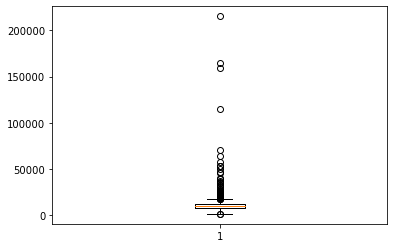

In [20]:
plt.boxplot(housing_data['LotArea'])
plt.show()
Q1 = housing_data['LotArea'].quantile(0.1)
Q3 = housing_data['LotArea'].quantile(0.9)
IQR = Q3 - Q1
housing_data = housing_data[(housing_data['LotArea'] >= Q1 - 1.5*IQR) & (housing_data['LotArea'] <= Q3 + 1.5*IQR)]

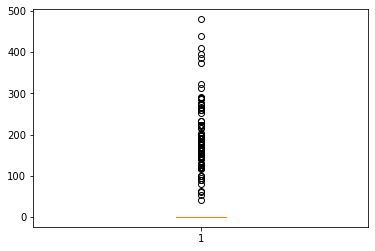

In [21]:
plt.boxplot(housing_data['ScreenPorch'])
plt.show()
Q1 = housing_data['ScreenPorch'].quantile(0.1)
Q3 = housing_data['ScreenPorch'].quantile(0.9)
IQR = Q3 - Q1
housing_data = housing_data[(housing_data['ScreenPorch'] >= Q1 - 1.5*IQR) & (housing_data['ScreenPorch'] <= Q3 + 1.5*IQR)]

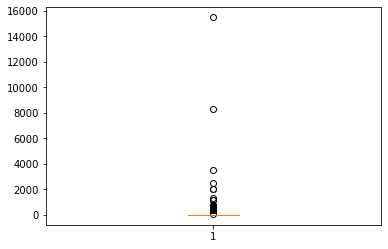

In [22]:
plt.boxplot(housing_data['MiscVal'])
plt.show()
Q1 = housing_data['MiscVal'].quantile(0.1)
Q3 = housing_data['MiscVal'].quantile(0.9)
IQR = Q3 - Q1
housing_data = housing_data[(housing_data['MiscVal'] >= Q1 - 1.5*IQR) & (housing_data['MiscVal'] <= Q3 + 1.5*IQR)]

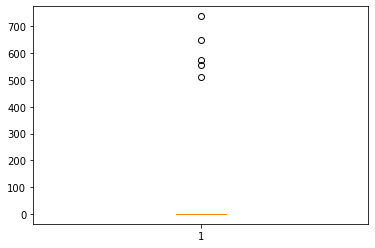

In [23]:
plt.boxplot(housing_data['PoolArea'])
plt.show()
Q1 = housing_data['PoolArea'].quantile(0.1)
Q3 = housing_data['PoolArea'].quantile(0.9)
IQR = Q3 - Q1
housing_data = housing_data[(housing_data['PoolArea'] >= Q1 - 1.5*IQR) & (housing_data['PoolArea'] <= Q3 + 1.5*IQR)]

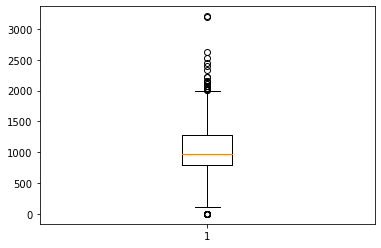

In [24]:
plt.boxplot(housing_data['TotalBsmtSF'])
plt.show()
Q1 = housing_data['TotalBsmtSF'].quantile(0.1)
Q3 = housing_data['TotalBsmtSF'].quantile(0.9)
IQR = Q3 - Q1
housing_data = housing_data[(housing_data['TotalBsmtSF'] >= Q1 - 1.5*IQR) & (housing_data['TotalBsmtSF'] <= Q3 + 1.5*IQR)]

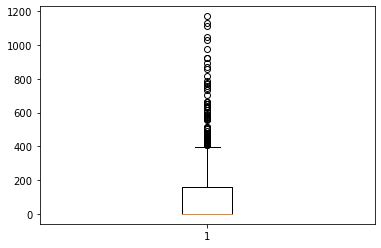

In [25]:
plt.boxplot(housing_data['MasVnrArea'])
plt.show()
Q1 = housing_data['MasVnrArea'].quantile(0.1)
Q3 = housing_data['MasVnrArea'].quantile(0.9)
IQR = Q3 - Q1
housing_data = housing_data[(housing_data['MasVnrArea'] >= Q1 - 1.5*IQR) & (housing_data['MasVnrArea'] <= Q3 + 1.5*IQR)]

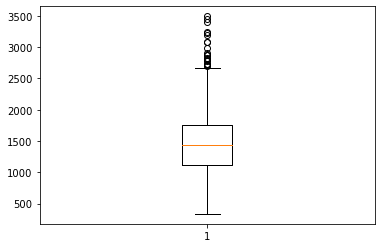

In [26]:
plt.boxplot(housing_data['GrLivArea'])
plt.show()
Q1 = housing_data['GrLivArea'].quantile(0.1)
Q3 = housing_data['GrLivArea'].quantile(0.9)
IQR = Q3 - Q1
housing_data = housing_data[(housing_data['GrLivArea'] >= Q1 - 1.5*IQR) & (housing_data['GrLivArea'] <= Q3 + 1.5*IQR)]

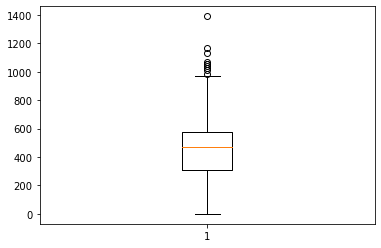

In [27]:
plt.boxplot(housing_data['GarageArea'])
plt.show()
Q1 = housing_data['GarageArea'].quantile(0.1)
Q3 = housing_data['GarageArea'].quantile(0.9)
IQR = Q3 - Q1
housing_data = housing_data[(housing_data['GarageArea'] >= Q1 - 1.5*IQR) & (housing_data['GarageArea'] <= Q3 + 1.5*IQR)]

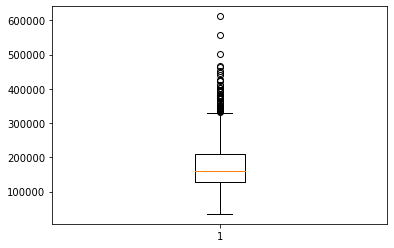

In [28]:
plt.boxplot(housing_data['SalePrice'])
plt.show()
Q1 = housing_data['SalePrice'].quantile(0.1)
Q3 = housing_data['SalePrice'].quantile(0.9)
IQR = Q3 - Q1
housing_data = housing_data[(housing_data['SalePrice'] >= Q1 - 1.5*IQR) & (housing_data['GarageArea'] <= Q3 + 1.5*IQR)]

##### Insights
* After visulaizing the box plots it shows the variables 'PoolArea', 'ScreenPorch' ,'MiscVal' , 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch' has no values/variance. So we can drop these.

In [29]:
#Dropping the variables 'PoolArea', 'ScreenPorch' ,'MiscVal' , 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch'

housing_data.drop(['PoolArea', 'ScreenPorch', 'MiscVal','LowQualFinSF','EnclosedPorch','3SsnPorch'], axis = 1, inplace = True)

In [30]:
#Checking for the data left after the removal of outliers
round(100*(len(housing_data)/1460),2)

86.3

#### After removing the null values and outliers we left with 86% data

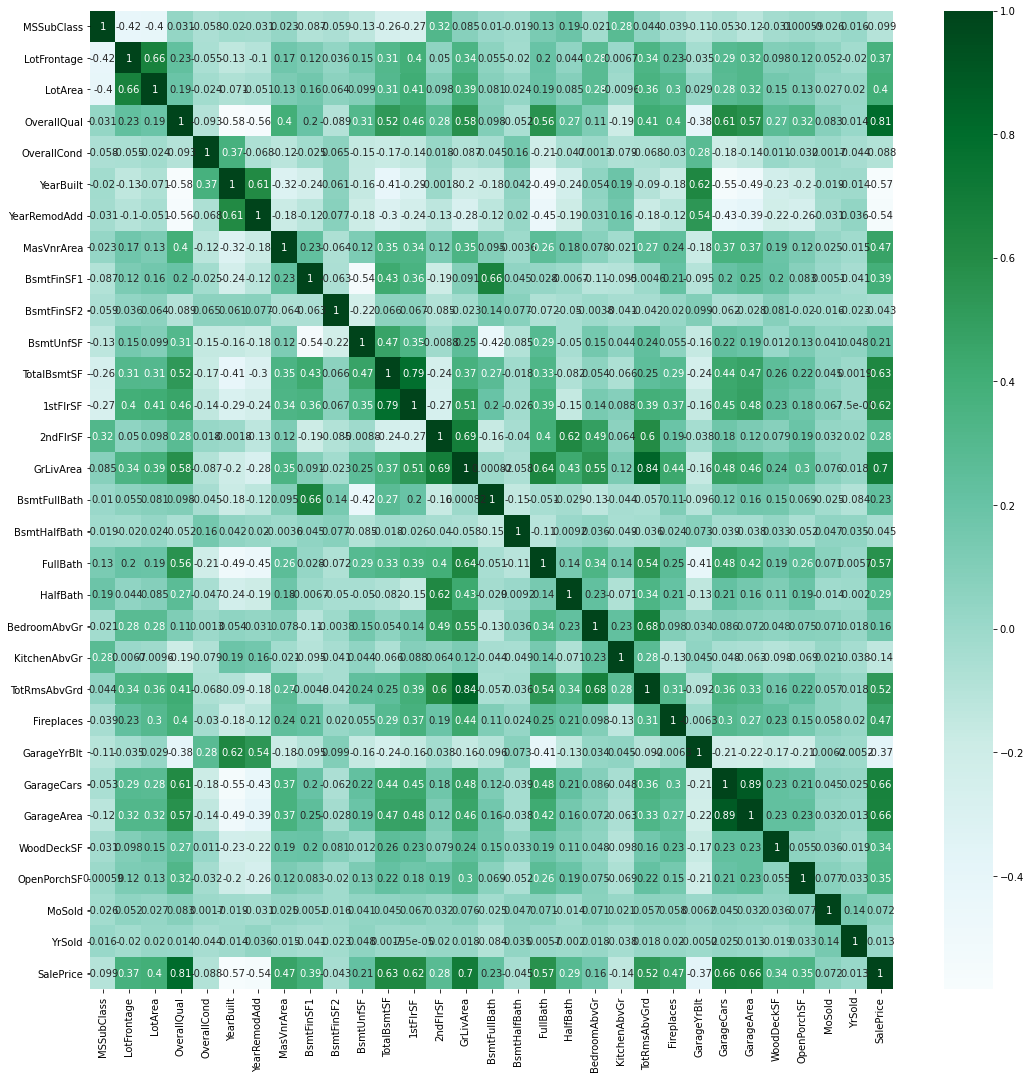

In [31]:
# checking corelation amongst numerical variables using heatmap 
plt.figure(figsize=(18,18))
sns.heatmap(housing_data[list(housing_data.dtypes[housing_data.dtypes!='object'].index)].corr(),cmap='BuGn',annot=True)
plt.show()

##### Insights
* The target variable SalePrice has high correlation with OverAllQual,GrLivArea,GarageCars, TotalBstmntSF, 1stFlrSF and  GarageArea columns

### Plotting the distribution of 'SalePrice' , the target variable

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

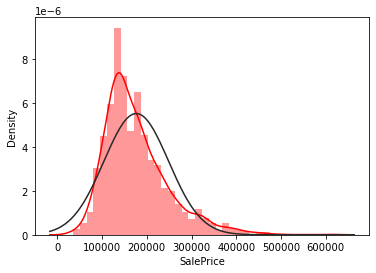

In [32]:
#Target variable distribution
sns.distplot(housing_data['SalePrice'], fit = norm, color='red')

##### Insights
* Target variable is skewed to the right we have to make it normally distributed by Log-Transformation

In [33]:
#Doing the log transformation
housing_data['SalePrice'] = np.log1p(housing_data['SalePrice'])

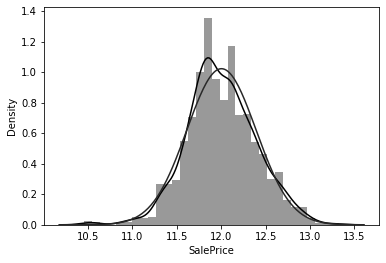

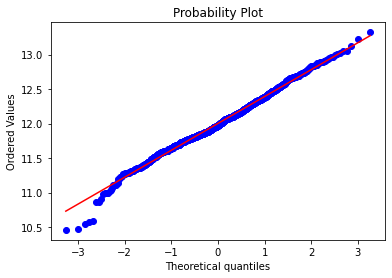

In [34]:
#Checking the distribution again after the log transformation
sns.distplot(housing_data['SalePrice'], fit = norm, color = 'black')
fig = plt.figure()
prob_plot = stats.probplot(housing_data['SalePrice'],plot = plt)

### Visualizing the highly corelated numerical  data

<Figure size 720x360 with 0 Axes>

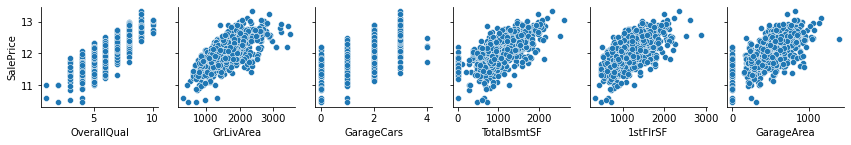

In [35]:

plt.figure(figsize=(10,5))
sns.pairplot(housing_data, x_vars=['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','1stFlrSF','GarageArea'  ], y_vars='SalePrice',height=2, aspect=1,kind='scatter')
plt.show()

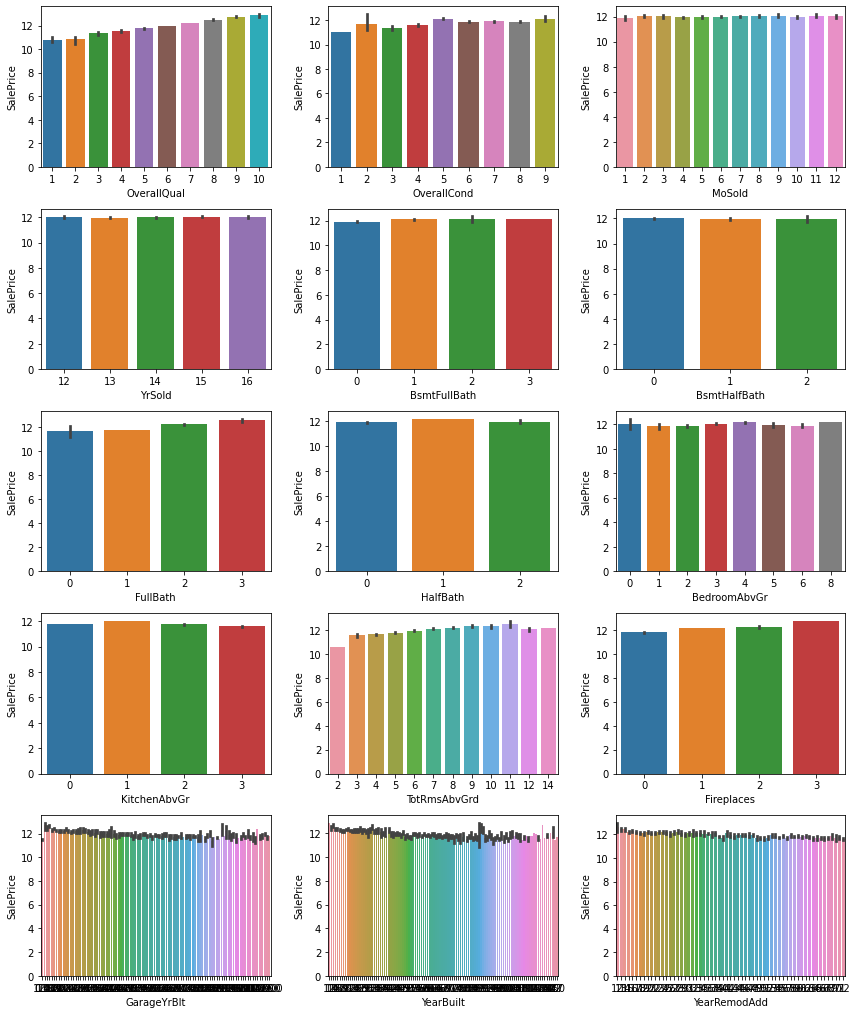

In [36]:
fig=plt.subplots(figsize=(12, 25))

for i, feature in enumerate(['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','YearBuilt','YearRemodAdd']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.barplot(housing_data[feature], housing_data['SalePrice'])
    plt.tight_layout()

In [37]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1260 entries, 0 to 1459
Data columns (total 70 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1260 non-null   int64  
 1   MSZoning       1260 non-null   object 
 2   LotFrontage    1047 non-null   float64
 3   LotArea        1260 non-null   int64  
 4   Street         1260 non-null   object 
 5   LotShape       1260 non-null   object 
 6   LandContour    1260 non-null   object 
 7   Utilities      1260 non-null   object 
 8   LotConfig      1260 non-null   object 
 9   LandSlope      1260 non-null   object 
 10  Neighborhood   1260 non-null   object 
 11  Condition1     1260 non-null   object 
 12  Condition2     1260 non-null   object 
 13  BldgType       1260 non-null   object 
 14  HouseStyle     1260 non-null   object 
 15  OverallQual    1260 non-null   int64  
 16  OverallCond    1260 non-null   int64  
 17  YearBuilt      1260 non-null   int64  
 18  YearRemo

### Visualizing Categorical Variables

In [38]:

#Checking Categorical Data
housing_data[list(housing_data.dtypes[housing_data.dtypes=='object'].index)].head(20)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NA,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
6,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
8,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Wd Shng,None,TA,TA,BrkTil,TA,TA,No,Unf,Unf,GasA,Gd,Y,FuseF,TA,Min1,TA,Detchd,Unf,Fa,TA,Y,WD,Abnorml
9,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,BrkTil,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,Gd,TA,Y,WD,Normal
10,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,Hip,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,Ex,Y,SBrkr,TA,Typ,NA,Detchd,Unf,TA,TA,Y,WD,Normal
11,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,Hip,CompShg,WdShing,Wd Shng,Stone,Ex,TA,PConc,Ex,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,Gd,BuiltIn,Fin,TA,TA,Y,New,Partial


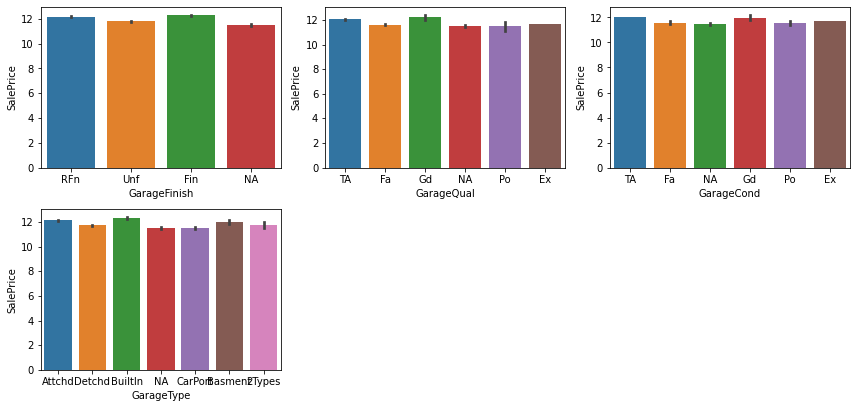

In [39]:
#Plotting garage features

fig=plt.subplots(figsize=(12, 25))

for i, feature in enumerate(['GarageFinish', 'GarageQual','GarageCond','GarageType']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.barplot(housing_data[feature], housing_data['SalePrice'])
    plt.tight_layout()

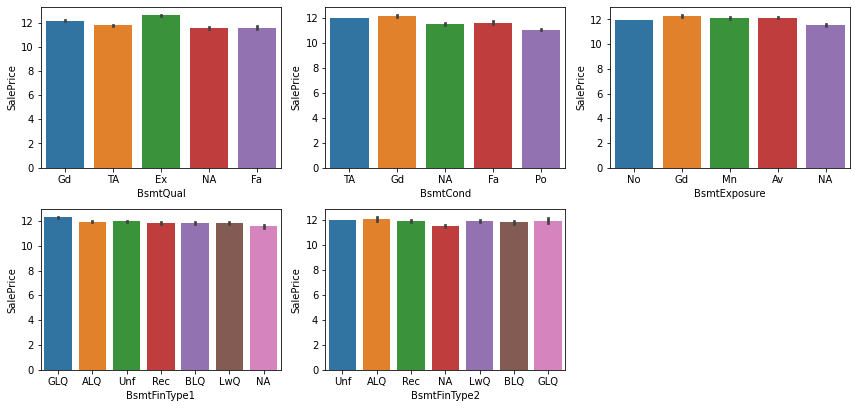

In [40]:
#Plotting basement features

fig=plt.subplots(figsize=(12, 25))

for i, feature in enumerate(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.barplot(housing_data[feature], housing_data['SalePrice'])
    plt.tight_layout()

In [41]:
print(housing_data['KitchenAbvGr'].value_counts())


1    1198
2      59
3       2
0       1
Name: KitchenAbvGr, dtype: int64


In [42]:
# dropping KitchenAbvGr for not having useful information
housing_data.drop(['KitchenAbvGr','MoSold','LotFrontage'], axis=1, inplace=True)

In [43]:
#droping unnessesary columns
housing_data.drop(['LandContour','Electrical','Heating','Condition2','RoofMatl','Condition1'], axis = 1, inplace = True)

####  Encoding Ordinal Categorical Data

In [44]:
housing_data['LotShape'] = housing_data['LotShape'].map({'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1,'None':0})
housing_data['Utilities'] = housing_data['Utilities'].map({'AllPub':3, 'NoSewr':2, 'NoSeWa':1, 'ELO':0})
housing_data['ExterQual'] = housing_data['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1,'None':0})
housing_data['GarageFinish'] = housing_data['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0,'None':0 })
housing_data['KitchenQual'] = housing_data['KitchenQual'].map({'Ex': 4, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1,'None':0})
housing_data['ExterCond'] = housing_data['ExterCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1,'None':0})
housing_data['BsmtExposure'] = housing_data['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0,'None':0})
housing_data['HeatingQC'] = housing_data['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1,'Noone':0})
housing_data['BldgType'] = housing_data['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1,'None':0})
housing_data['BsmtQual'] = housing_data['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0,'None':0})
housing_data['LotConfig'] = housing_data['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1,'None':0})
housing_data['BsmtCond'] = housing_data['BsmtCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA':0,'None':0})
housing_data['GarageQual'] = housing_data['GarageQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA':0,'None':0})
housing_data['FireplaceQu'] = housing_data['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0,'None':0})
housing_data['BsmtFinType1'] = housing_data['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1,'NA': 0,'None':0})
housing_data['BsmtFinType2'] = housing_data['BsmtFinType2'].map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_data['Functional'] = housing_data['Functional'].map({'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3,'Sev': 2,'Sal':1,'None':0})
housing_data['HouseStyle'] = housing_data['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4,'1.5Fin': 3, '1.5Unf': 2, '1Story': 1,'None':0 })
housing_data['SaleCondition'] = housing_data['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0,'Alloca': 0, 'AdjLand': 0,'None':0})
housing_data['MasVnrType'] = housing_data['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
housing_data['LandSlope'] = housing_data['LandSlope'].map({'Gtl': 2, 'Mod': 1, 'Sev': 0,'None':0 })
housing_data['CentralAir'] = housing_data['CentralAir'].map({'N':0,'Y':1})
housing_data['GarageCond'] = housing_data['GarageCond'].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [45]:
# Checking the features after encoding

housing_data[['LotShape', 'ExterQual', 'GarageFinish', 'KitchenQual', 'ExterCond', 'BsmtExposure', 'HeatingQC', 'BldgType', 'BsmtQual', 'LotConfig', 'BsmtCond',
            'GarageQual','FireplaceQu','BsmtFinType1','Functional','HouseStyle','SaleCondition','MasVnrType','LandSlope']].head()

,LotShape,ExterQual,GarageFinish,KitchenQual,ExterCond,BsmtExposure,HeatingQC,BldgType,BsmtQual,LotConfig,BsmtCond,GarageQual,FireplaceQu,BsmtFinType1,Functional,HouseStyle,SaleCondition,MasVnrType,LandSlope
0,4,4,2,4,3,1,5,1,4,5,3,3,0,6,8,4,1,1,2
1,4,3,2,3,3,4,5,1,4,2,3,3,3,5,8,1,1,0,2
2,3,4,2,4,3,2,5,1,4,5,3,3,3,6,8,4,1,1,2
3,3,3,1,4,3,1,4,1,3,4,4,3,4,5,8,4,0,0,2
4,3,4,2,4,3,3,5,1,4,2,3,3,3,6,8,4,1,1,2


### Creating dummy variables for nominal category features

In [46]:
dummy_variables=housing_data[['MSZoning', 'Street', 'LotConfig', 'Neighborhood','BldgType', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType','PavedDrive','SaleType','SaleCondition']]

In [47]:
dummy_variables.head()

,MSZoning,Street,LotConfig,Neighborhood,BldgType,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,Foundation,GarageType,PavedDrive,SaleType,SaleCondition
0,RL,Pave,5,CollgCr,1,Gable,VinylSd,VinylSd,1,PConc,Attchd,Y,WD,1
1,RL,Pave,2,Veenker,1,Gable,MetalSd,MetalSd,0,CBlock,Attchd,Y,WD,1
2,RL,Pave,5,CollgCr,1,Gable,VinylSd,VinylSd,1,PConc,Attchd,Y,WD,1
3,RL,Pave,4,Crawfor,1,Gable,Wd Sdng,Wd Shng,0,BrkTil,Detchd,Y,WD,0
4,RL,Pave,2,NoRidge,1,Gable,VinylSd,VinylSd,1,PConc,Attchd,Y,WD,1


In [48]:
NominalColumns = pd.get_dummies(dummy_variables, drop_first=True)
NominalColumns.head()

,LotConfig,BldgType,MasVnrType,SaleCondition,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,5,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,2,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,5,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,4,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
4,2,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [49]:
#Merging the dummy columns with original dataset after dropping the previous ones.
housing_data = housing_data.drop(list(dummy_variables.columns), axis=1)
housing_data = pd.concat([housing_data, NominalColumns], axis=1)

In [50]:
#checking columns 
housing_data.columns

Index(['MSSubClass', 'LotArea', 'LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       ...
       'PavedDrive_P', 'PavedDrive_Y', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD'], dtype='object', length=134)

In [51]:
#Checking the shape of the dataframe
housing_data.shape

(1260, 134)

# Step 3: Splitting the Data into Training and Testing Sets

##  Splitting the train and test data sets

In [52]:
# split into train and test sets
from sklearn.model_selection import train_test_split
housing_train, housing_test = train_test_split(housing_data, train_size=0.7, test_size = 0.3, random_state=100)


In [53]:
print(housing_train.shape)
print(housing_test.shape)

(882, 134)
(378, 134)


##  Rescaling the Features

In [54]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()

In [55]:
# scaling the features for train set

cols = housing_train.columns
housing_train = pd.DataFrame(scalar.fit_transform(housing_train))
housing_train.columns = cols
housing_train.columns

Index(['MSSubClass', 'LotArea', 'LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       ...
       'PavedDrive_P', 'PavedDrive_Y', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD'], dtype='object', length=134)

In [56]:
housing_train.head()

,MSSubClass,LotArea,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,YrSold,SalePrice,LotConfig,BldgType,MasVnrType,...,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,0.235294,0.271765,1.0,0.0,1.0,0.428571,0.555556,0.428571,0.031008,0.066667,0.0,0.666667,0.333333,0.8,0.75,0.25,0.166667,0.000000,0.166667,0.0,0.338133,0.288431,1.00,1.0,0.179909,0.400440,0.355176,0.000000,0.0,0.666667,0.5,0.5,1.0,0.6,1.0,0.333333,0.8,0.146552,1.000000,0.50,0.280576,0.6,0.6,0.000000,0.047809,1.0,0.538435,1.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.823529,0.025579,1.0,0.0,1.0,0.428571,0.333333,0.428571,0.279070,0.616667,0.0,0.333333,0.333333,0.6,0.75,0.25,0.666667,0.152651,0.166667,0.0,0.098467,0.216323,0.50,1.0,0.096804,0.300330,0.239949,0.000000,0.0,0.333333,0.5,0.5,0.5,0.4,1.0,0.000000,0.0,0.422414,0.666667,0.25,0.205755,0.6,0.6,0.163043,0.191235,0.0,0.301771,1.00,0.75,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.235294,0.833283,0.0,0.0,1.0,0.428571,0.666667,0.428571,0.023256,0.066667,0.0,0.666667,0.333333,1.0,1.00,0.25,0.166667,0.000000,0.166667,0.0,0.403158,0.343899,1.00,1.0,0.252511,0.623762,0.534030,0.000000,0.0,0.666667,0.5,0.5,1.0,0.7,1.0,0.333333,0.8,0.137931,0.666667,0.50,0.303597,0.6,0.6,0.000000,0.199203,1.0,0.719350,0.50,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.823529,0.051271,1.0,0.0,1.0,0.428571,0.666667,0.428571,0.069767,0.166667,0.0,0.666667,0.333333,0.8,0.75,0.25,1.000000,0.292962,0.166667,0.0,0.014863,0.266640,1.00,1.0,0.154795,0.389989,0.331751,0.333333,0.0,0.666667,0.5,0.5,1.0,0.4,1.0,0.000000,0.0,0.189655,0.333333,0.50,0.352518,0.6,0.6,0.207880,0.099602,1.0,0.540587,0.25,1.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000000,0.288121,1.0,0.0,1.0,0.000000,0.444444,0.714286,0.434109,0.233333,0.0,0.666667,0.333333,0.6,0.75,0.75,0.166667,0.000000,0.166667,0.0,0.048769,0.041601,0.75,1.0,0.263014,0.000000,0.182336,0.000000,0.0,0.333333,0.0,0.5,1.0,0.3,1.0,0.000000,0.0,0.594828,0.333333,0.50,0.297842,0.6,0.6,0.266304,0.000000,0.5,0.417039,0.75,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [57]:
# scaling the features for test set

cols = housing_test.columns
housing_test = pd.DataFrame(scalar.transform(housing_test))
housing_test.columns = cols
housing_test.columns

Index(['MSSubClass', 'LotArea', 'LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       ...
       'PavedDrive_P', 'PavedDrive_Y', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD'], dtype='object', length=134)

In [58]:
housing_test.head()

,MSSubClass,LotArea,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,YrSold,SalePrice,LotConfig,BldgType,MasVnrType,...,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,0.352941,0.359924,0.666667,0.0,1.0,1.000000,0.666667,0.428571,0.139535,0.300000,0.096447,0.666667,0.333333,0.8,0.75,0.25,0.166667,0.000000,0.166667,0.0,0.178356,0.152139,0.75,1.0,0.213699,0.368537,0.360241,0.000000,0.0,0.666667,0.5,0.500000,1.0,0.5,1.0,0.333333,0.6,0.267241,0.666667,0.50,0.289209,0.6,0.6,0.222826,0.000000,0.75,0.529798,0.25,0.00,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.235294,0.365351,1.000000,0.0,1.0,0.428571,0.777778,0.428571,0.031008,0.083333,0.355330,0.666667,0.333333,0.8,0.75,0.75,1.000000,0.249543,0.166667,0.0,0.237808,0.419176,1.00,1.0,0.330594,0.465347,0.496993,0.333333,0.0,0.666667,0.5,0.500000,1.0,0.6,1.0,0.333333,0.8,0.163793,1.000000,0.50,0.529496,0.6,0.6,0.243207,0.119522,1.00,0.719701,1.00,0.00,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.588235,0.250171,1.000000,0.0,1.0,0.000000,0.555556,0.428571,0.124031,0.283333,0.000000,0.666667,0.333333,0.8,0.75,0.25,1.000000,0.137112,0.166667,0.0,0.417557,0.475040,1.00,1.0,0.394977,0.000000,0.273821,0.000000,0.0,0.666667,0.0,0.333333,1.0,0.3,1.0,0.000000,0.0,0.250000,0.666667,0.50,0.381295,0.6,0.6,0.000000,0.125498,0.50,0.516168,1.00,0.75,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.000000,0.246679,1.000000,0.0,1.0,0.000000,0.444444,0.714286,0.325581,0.100000,0.112944,0.333333,0.333333,0.6,0.75,0.25,0.833333,0.205667,0.166667,0.0,0.192290,0.342314,1.00,1.0,0.257991,0.000000,0.178854,0.000000,0.0,0.333333,0.0,0.500000,1.0,0.3,1.0,0.000000,0.0,0.474138,1.000000,0.25,0.207194,0.6,0.6,0.086957,0.000000,0.25,0.456992,1.00,0.00,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.058824,0.187476,1.000000,0.0,1.0,0.285714,0.333333,0.428571,0.651163,1.000000,0.000000,0.333333,0.333333,0.6,0.75,0.25,0.666667,0.069470,0.166667,0.0,0.291686,0.309033,0.50,1.0,0.234703,0.000000,0.276670,0.000000,0.0,0.333333,0.0,0.333333,0.5,0.3,1.0,0.000000,0.0,0.517241,0.333333,0.50,0.387770,0.6,0.6,0.000000,0.045817,0.

### Dividing into X and Y sets for the model building

In [59]:
# Split into X & y

y_train = housing_train.pop('SalePrice')
X_train = housing_train

y_test = housing_test.pop('SalePrice')
X_test = housing_test

## Step 4:  Linear Regression

In [60]:
# Instantiate
lm = LinearRegression()
# Fit a line
lm.fit(X_train, y_train)


# Running RFE to downselect 30 best features as a coarse tuning
rfe = RFE(lm, 30)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [61]:
X_train.shape

(882, 133)

###  Model Building & Evaluation

* Fit a regression line through the training data using statsmodels.
* RFE :Recursive feature elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)


In [62]:
# Columns selected by RFE and their weights

list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('MSSubClass', False, 92),
 ('LotArea', True, 1),
 ('LotShape', False, 80),
 ('Utilities', False, 17),
 ('LandSlope', False, 53),
 ('HouseStyle', False, 82),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', True, 1),
 ('MasVnrArea', False, 72),
 ('ExterQual', False, 77),
 ('ExterCond', True, 1),
 ('BsmtQual', False, 23),
 ('BsmtCond', False, 24),
 ('BsmtExposure', False, 12),
 ('BsmtFinType1', False, 95),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 21),
 ('BsmtFinSF2', False, 14),
 ('BsmtUnfSF', False, 15),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 10),
 ('CentralAir', False, 45),
 ('1stFlrSF', False, 78),
 ('2ndFlrSF', False, 79),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 37),
 ('FullBath', False, 58),
 ('HalfBath', False, 66),
 ('BedroomAbvGr', True, 1),
 ('KitchenQual', False, 103),
 ('TotRmsAbvGrd', False, 3),
 ('Functional', True, 1),
 ('Fireplaces', False, 20),
 ('FireplaceQu', Fals

In [63]:
#Columns Selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'ExterCond', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'BedroomAbvGr', 'Functional', 'GarageCars', 'GarageQual', 'GarageCond', 'OpenPorchSF', 'BldgType', 'Neighborhood_Crawfor', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_Stone', 'Foundation_Wood', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLI'], dtype='object')

In [64]:

#Columns not Selected by RFE
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       ...
       'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_NA', 'PavedDrive_P', 'PavedDrive_Y', 'SaleType_ConLD', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD'], dtype='object', length=103)

In [65]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [66]:
X_train_rfe.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterCond,BsmtFinSF1,TotalBsmtSF,GrLivArea,BsmtFullBath,BedroomAbvGr,Functional,GarageCars,GarageQual,GarageCond,OpenPorchSF,BldgType,Neighborhood_Crawfor,Neighborhood_NridgHt,Neighborhood_StoneBr,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_Stone,Foundation_Wood,SaleType_CWD,SaleType_Con,SaleType_ConLI
0,0.271765,0.555556,0.428571,0.031008,0.066667,0.333333,0.000000,0.288431,0.355176,0.000000,0.5,1.0,0.50,0.6,0.6,0.047809,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.025579,0.333333,0.428571,0.279070,0.616667,0.333333,0.152651,0.216323,0.239949,0.000000,0.5,1.0,0.25,0.6,0.6,0.191235,0.75,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.833283,0.666667,0.428571,0.023256,0.066667,0.333333,0.000000,0.343899,0.534030,0.000000,0.5,1.0,0.50,0.6,0.6,0.199203,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.051271,0.666667,0.428571,0.069767,0.166667,0.333333,0.292962,0.266640,0.331751,0.333333,0.5,1.0,0.50,0.6,0.6,0.099602,1.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.288121,0.444444,0.714286,0.434109,0.233333,0.333333,0.000000,0.041601,0.182336,0.000000,0.5,1.0,0.50,0.6,0.6,0.000000,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Building Linear Model using 'STATS MODEL' , for the detailed statistics

### Model 1: Starting with all variables selected by RFE

In [67]:
import statsmodels.api as sm

# adding constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

# create model
lm = sm.OLS(y_train, X_train_rfe).fit()



In [68]:
# Checking the parameters 

lm.params

const                   0.178398
LotArea                 0.055482
OverallQual             0.200780
OverallCond             0.116606
YearBuilt              -0.151624
YearRemodAdd           -0.031416
ExterCond              -0.034111
BsmtFinSF1              0.060709
TotalBsmtSF             0.105492
GrLivArea               0.340250
BsmtFullBath            0.035690
BedroomAbvGr           -0.047459
Functional              0.067108
GarageCars              0.058174
GarageQual              0.084181
GarageCond             -0.044860
OpenPorchSF             0.039166
BldgType               -0.038262
Neighborhood_Crawfor    0.050931
Neighborhood_NridgHt    0.032150
Neighborhood_StoneBr    0.044048
RoofStyle_Gable        -0.040640
RoofStyle_Gambrel      -0.041449
RoofStyle_Hip          -0.040399
Exterior1st_BrkComm    -0.101773
Exterior1st_BrkFace     0.038082
Exterior1st_Stone       0.007234
Foundation_Wood        -0.059935
SaleType_CWD            0.053234
SaleType_Con            0.038938
SaleType_C

In [69]:
# check the summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     338.5
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        00:26:58   Log-Likelihood:                 1637.4
No. Observations:                 882   AIC:                            -3213.
Df Residuals:                     851   BIC:                            -3064.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1784      0.021      8.492      0.000       0.137       0.220
LotArea                  0.0555      0.012      4.556      0.000       0.032       0.079
OverallQual              0.2008      0.016     12.926      0.000       0.170       0.231
OverallCond              0.1166      0.011     10.674      0.000       0.095       0.138
YearBuilt               -0.1516      0.010    -15.361      0.000      -0.171      -0.132
YearRemodAdd            -0.0314      0.006     -5.462      0.000      -0.043      -0.020
ExterCond               -0.0341      0.013     -2.635      0.009      -0.060      -0.009
BsmtFinSF1               0.0607      0.010      6.082      0.000       0.041       0.080
TotalBsmtSF              0.1055      0.011      9.367      0.000       0.083       0.128
GrLivArea                0.3402      0.015     22.162      0.000       0.310       0.370
BsmtFullBath             0.0357      0.010      3.414      0.001       0.015       0.056
BedroomAbvGr            -0.0475      0.013     -3.523      0.000      -0.074      -0.021
Functional               0.0671      0.011      5.848      0.000       0.045       0.090
GarageCars               0.0582      0.012      5.005      0.000       0.035       0.081
GarageQual               0.0842      0.034      2.497      0.013       0.018       0.150
GarageCond              -0.0449      0.034     -1.324      0.186      -0.111       0.022
OpenPorchSF              0.0392      0.012      3.329      0.001       0.016       0.062
BldgType                -0.0383      0.006     -6.352      0.000      -0.050      -0.026
Neighborhood_Crawfor     0.0509      0.008      6.367      0.000       0.035       0.067
Neighborhood_NridgHt     0.0322      0.007      4.744      0.000       0.019       0.045
Neighborhood_StoneBr     0.0440      0.013      3.466      0.001       0.019       0.069
RoofStyle_Gable         -0.0406      0.013     -3.123      0.002      -0.066      -0.015
RoofStyle_Gambrel       -0.0414      0.021     -2.003      0.046      -0.082      -0.001
RoofStyle_Hip           -0.0404      0.013     -3.043      0.002      -0.066      -0.014
Exterior1st_BrkComm     -0.1018      0.029     -3.529      0.000      -0.158      -0.045
Exterior1st_BrkFace      0.0381      0.007      5.276      0.000       0.024       0.052
Exterior1st_Stone        0.0072      0.039      0.183      0.855      -0.070       0.085
Foundation_Wood         -0.0599      0.028     -2.168      0.030      -0.114      -0.006
SaleType_CWD             0.0532      0.028      1.935      0.053      -0.001       0.107
SaleType_Con             0.0389      0.040      0.976      0.329      -0.039       0.117
SaleType_ConLI          -0.0438      0.028     -1.570      0.117      -0.099       0.011
=========================================================

#### Check for the VIF values of the feature variables. 

In [70]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,262.80
21,RoofStyle_Gable,16.11
23,RoofStyle_Hip,15.59
14,GarageQual,14.82
15,GarageCond,14.77
4,YearBuilt,3.20
2,OverallQual,3.15
9,GrLivArea,3.06
13,GarageCars,2.90
5,YearRemodAdd,2.37


### Insights

####  We generally want a VIF that is less than 5 and P value <0.05. So there are clearly some variables we need to drop.
#### So from above observation 'Exterior1st_Stone' has high p value . So, we are dropping this variable



In [71]:
#Dropping 'Exterior1st_Stone' variable as it is insignificant in front of other variables
X_train_new = X_train_rfe.drop(["Exterior1st_Stone"], axis = 1)

In [72]:
X_train_new.head()

,const,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterCond,BsmtFinSF1,TotalBsmtSF,GrLivArea,BsmtFullBath,BedroomAbvGr,Functional,GarageCars,GarageQual,GarageCond,OpenPorchSF,BldgType,Neighborhood_Crawfor,Neighborhood_NridgHt,Neighborhood_StoneBr,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,Exterior1st_BrkComm,Exterior1st_BrkFace,Foundation_Wood,SaleType_CWD,SaleType_Con,SaleType_ConLI
0,1.0,0.271765,0.555556,0.428571,0.031008,0.066667,0.333333,0.000000,0.288431,0.355176,0.000000,0.5,1.0,0.50,0.6,0.6,0.047809,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.025579,0.333333,0.428571,0.279070,0.616667,0.333333,0.152651,0.216323,0.239949,0.000000,0.5,1.0,0.25,0.6,0.6,0.191235,0.75,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.833283,0.666667,0.428571,0.023256,0.066667,0.333333,0.000000,0.343899,0.534030,0.000000,0.5,1.0,0.50,0.6,0.6,0.199203,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.051271,0.666667,0.428571,0.069767,0.166667,0.333333,0.292962,0.266640,0.331751,0.333333,0.5,1.0,0.50,0.6,0.6,0.099602,1.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.288121,0.444444,0.714286,0.434109,0.233333,0.333333,0.000000,0.041601,0.182336,0.000000,0.5,1.0,0.50,0.6,0.6,0.000000,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Model 2 : Rebuilding model without 'Exterior1st_Stone' Variable

In [73]:
# Add a constant
X_train_rfe = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_new).fit()

In [74]:
#Let's see the summary of our linear model2
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     350.5
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        00:26:59   Log-Likelihood:                 1637.3
No. Observations:                 882   AIC:                            -3215.
Df Residuals:                     852   BIC:                            -3071.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1785 

In [75]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,262.69
21,RoofStyle_Gable,16.11
23,RoofStyle_Hip,15.59
14,GarageQual,14.81
15,GarageCond,14.77
4,YearBuilt,3.19
2,OverallQual,3.14
9,GrLivArea,3.06
13,GarageCars,2.90
5,YearRemodAdd,2.37


### Insights
#### So from above observation 'SaleType_Con ' has high P  . We will drop this variable

In [76]:
#Dropping 'SaleType_Con' variable as it is insignificant in front of other variables
X_train_new = X_train_rfe.drop(["SaleType_Con"], axis = 1)

### Model 3 : Rebuilding model without 'SaleType_Con' variable

In [77]:
# Add a constant
X_train_rfe = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_new).fit()

In [78]:
#Let's see the summary of our linear model3
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     363.0
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        00:26:59   Log-Likelihood:                 1636.9
No. Observations:                 882   AIC:                            -3216.
Df Residuals:                     853   BIC:                            -3077.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1776 

In [79]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,262.19
21,RoofStyle_Gable,16.09
23,RoofStyle_Hip,15.58
14,GarageQual,14.81
15,GarageCond,14.77
4,YearBuilt,3.19
2,OverallQual,3.13
9,GrLivArea,3.05
13,GarageCars,2.90
5,YearRemodAdd,2.37


### Insights
#### So from above observation 'GarageCond	 ' has high P value . We will drop this variable

In [80]:
#Dropping 'GarageCond'  variable as it is insignificant in front of other variables
X_train_new = X_train_rfe.drop(["GarageCond"], axis = 1)

### Model 4 : Rebuilding model without 'GarageCond' variable

In [81]:
# Add a constant
X_train_rfe = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_new).fit()

In [82]:
#Let's see the summary of our linear model4
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     376.1
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        00:26:59   Log-Likelihood:                 1636.0
No. Observations:                 882   AIC:                            -3216.
Df Residuals:                     854   BIC:                            -3082.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1770 

In [83]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,262.06
20,RoofStyle_Gable,16.09
22,RoofStyle_Hip,15.58
4,YearBuilt,3.18
2,OverallQual,3.13
9,GrLivArea,3.05
13,GarageCars,2.87
5,YearRemodAdd,2.36
7,BsmtFinSF1,2.21
8,TotalBsmtSF,1.91


### Insights
#### So from above observation 'SaleType_ConLI	 ' has high P value . We will drop this variable

In [84]:
#Dropping 'SaleType_ConLI' variable as it is insignificant in front of other variables
X_train_new = X_train_rfe.drop(["SaleType_ConLI"], axis = 1)

### Model 5 : Rebuilding model without 'SaleType_ConLI' variable

In [85]:
# Add a constant
X_train_rfe = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_new).fit()

In [86]:
#Let's see the summary of our linear model5
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     389.8
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        00:27:00   Log-Likelihood:                 1634.7
No. Observations:                 882   AIC:                            -3215.
Df Residuals:                     855   BIC:                            -3086.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1786 

In [87]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,261.45
20,RoofStyle_Gable,16.09
22,RoofStyle_Hip,15.58
4,YearBuilt,3.18
2,OverallQual,3.13
9,GrLivArea,3.04
13,GarageCars,2.87
5,YearRemodAdd,2.36
7,BsmtFinSF1,2.19
8,TotalBsmtSF,1.91


### Insights
#### So from above observation 'SaleType_CWD   ' has high P value . We will drop this variable

In [88]:
#Dropping 'SaleType_CWD ' variable as it is insignificant in front of other variables
X_train_new = X_train_rfe.drop(["SaleType_CWD"], axis = 1)

### Model 6 : Rebuilding model without 'SaleType_CWD' variable

In [89]:
# Add a constant
X_train_rfe = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_new).fit()

In [90]:
#Let's see the summary of our linear model6
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     404.0
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        00:27:00   Log-Likelihood:                 1632.8
No. Observations:                 882   AIC:                            -3214.
Df Residuals:                     856   BIC:                            -3089.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1781 

In [91]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,261.42
20,RoofStyle_Gable,16.09
22,RoofStyle_Hip,15.57
4,YearBuilt,3.17
2,OverallQual,3.12
9,GrLivArea,3.04
13,GarageCars,2.86
5,YearRemodAdd,2.35
7,BsmtFinSF1,2.19
8,TotalBsmtSF,1.90


### Insights
#### So from above observation 'RoofStyle_Gambrel ' has high P value . We will drop this variable

In [92]:
#Dropping 'RoofStyle_Gambrel '  variable as it is insignificant in front of other variables
X_train_new = X_train_rfe.drop(["RoofStyle_Gambrel"], axis = 1)

### Model 7 : Rebuilding model without 'RoofStyle_Gambrel ' variable

In [93]:
# Add a constant
X_train_rfe = sm.add_constant(X_train_new)

# Create a first fitted model
lr7 = sm.OLS(y_train, X_train_new).fit()

In [94]:
#Let's see the summary of our linear model7
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     419.3
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        00:27:01   Log-Likelihood:                 1630.9
No. Observations:                 882   AIC:                            -3212.
Df Residuals:                     857   BIC:                            -3092.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1614 

In [95]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,217.05
21,RoofStyle_Hip,9.75
20,RoofStyle_Gable,9.72
4,YearBuilt,3.17
2,OverallQual,3.11
9,GrLivArea,3.04
13,GarageCars,2.83
5,YearRemodAdd,2.34
7,BsmtFinSF1,2.19
8,TotalBsmtSF,1.90


### Insights
#### So from above observation 'RoofStyle_Hip' has high P and high VIF value . We will drop this variable

In [96]:
#Dropping 'RoofStyle_Hip'  variable as it is insignificant in front of other variables
X_train_new = X_train_rfe.drop(["RoofStyle_Hip"], axis = 1)

### Model 8 : Rebuilding model without 'RoofStyle_Hip' variable

In [97]:
# Add a constant
X_train_rfe = sm.add_constant(X_train_new)

# Create a first fitted model
lr8 = sm.OLS(y_train, X_train_new).fit()

In [98]:
#Let's see the summary of our linear model8

In [99]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,156.33
4,YearBuilt,3.16
2,OverallQual,3.11
9,GrLivArea,3.03
13,GarageCars,2.83
5,YearRemodAdd,2.34
7,BsmtFinSF1,2.19
10,BsmtFullBath,1.88
8,TotalBsmtSF,1.88
1,LotArea,1.80


### Insights
#### So from above observation 'RoofStyle_Gable	' has high P value . We will drop this variable

In [100]:
#Dropping 'RoofStyle_Gable' variable as it is insignificant in front of other variables
X_train_new = X_train_rfe.drop(["RoofStyle_Gable"], axis = 1)

### Model 9 : Rebuilding model without 'RoofStyle_Gable' variable

In [101]:
# Add a constant
X_train_rfe = sm.add_constant(X_train_new)

# Create a first fitted model
lr9 = sm.OLS(y_train, X_train_new).fit()

In [102]:
#Let's see the summary of our linear model9
print(lr9.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     455.1
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        00:27:01   Log-Likelihood:                 1627.8
No. Observations:                 882   AIC:                            -3210.
Df Residuals:                     859   BIC:                            -3100.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1346 

In [103]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,145.53
4,YearBuilt,3.15
2,OverallQual,3.09
9,GrLivArea,3.03
13,GarageCars,2.83
5,YearRemodAdd,2.33
7,BsmtFinSF1,2.17
10,BsmtFullBath,1.88
8,TotalBsmtSF,1.87
1,LotArea,1.79


### Insights
#### So from above observation 'Foundation_Wood	' has high P value . We will drop this variable

In [104]:
#Dropping SaleType_ConLI variable as it is insignificant in front of other variables
X_train_new = X_train_rfe.drop(["Foundation_Wood"], axis = 1)

### Model 10 : Rebuilding model without 'Foundation_Wood' variable

In [105]:
# Add a constant
X_train_rfe = sm.add_constant(X_train_new)

# Create a first fitted model
lr10 = sm.OLS(y_train, X_train_new).fit()

In [106]:
#Let's see the summary of our linear model10
print(lr10.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     474.4
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        00:27:02   Log-Likelihood:                 1625.3
No. Observations:                 882   AIC:                            -3207.
Df Residuals:                     860   BIC:                            -3101.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1352 

In [107]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,145.49
4,YearBuilt,3.15
2,OverallQual,3.09
9,GrLivArea,3.03
13,GarageCars,2.83
5,YearRemodAdd,2.33
7,BsmtFinSF1,2.15
10,BsmtFullBath,1.87
8,TotalBsmtSF,1.86
1,LotArea,1.79


### Insights
#### So from above observation 'ExterCond' has high P value . We will drop this variable

In [108]:
#Dropping ExterCond variable as it is insignificant in front of other variables
X_train_new = X_train_rfe.drop(["ExterCond"], axis = 1)

### Model 11 : Rebuilding model without 'ExterCond' variable

In [109]:
# Add a constant
X_train_rfe = sm.add_constant(X_train_new)

# Create a first fitted model
lr11 = sm.OLS(y_train, X_train_new).fit()

In [110]:
#Let's see the summary of our linear model11
print(lr11.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     494.1
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        00:27:02   Log-Likelihood:                 1621.6
No. Observations:                 882   AIC:                            -3201.
Df Residuals:                     861   BIC:                            -3101.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1289 

In [111]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,142.35
4,YearBuilt,3.15
2,OverallQual,3.08
8,GrLivArea,3.03
12,GarageCars,2.83
5,YearRemodAdd,2.33
6,BsmtFinSF1,2.15
7,TotalBsmtSF,1.86
9,BsmtFullBath,1.86
1,LotArea,1.79


### Insights
#### So from above observation 'Exterior1st_BrkComm' has high P value . We will drop this variable

In [112]:
#Dropping ExterCond variable as it is insignificant in front of other variables
X_train_new = X_train_rfe.drop(["Exterior1st_BrkComm"], axis = 1)

### Model 12 : Rebuilding model without 'Exterior1st_BrkComm' variable

In [113]:
# Add a constant
X_train_rfe = sm.add_constant(X_train_new)

# Create a first fitted model
lr12 = sm.OLS(y_train, X_train_new).fit()

In [114]:
#Let's see the summary of our linear model12
print(lr12.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     516.2
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        00:27:02   Log-Likelihood:                 1618.1
No. Observations:                 882   AIC:                            -3196.
Df Residuals:                     862   BIC:                            -3100.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1229 

In [115]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,139.33
4,YearBuilt,3.15
2,OverallQual,3.08
8,GrLivArea,3.03
12,GarageCars,2.83
5,YearRemodAdd,2.33
6,BsmtFinSF1,2.15
7,TotalBsmtSF,1.86
9,BsmtFullBath,1.86
1,LotArea,1.79


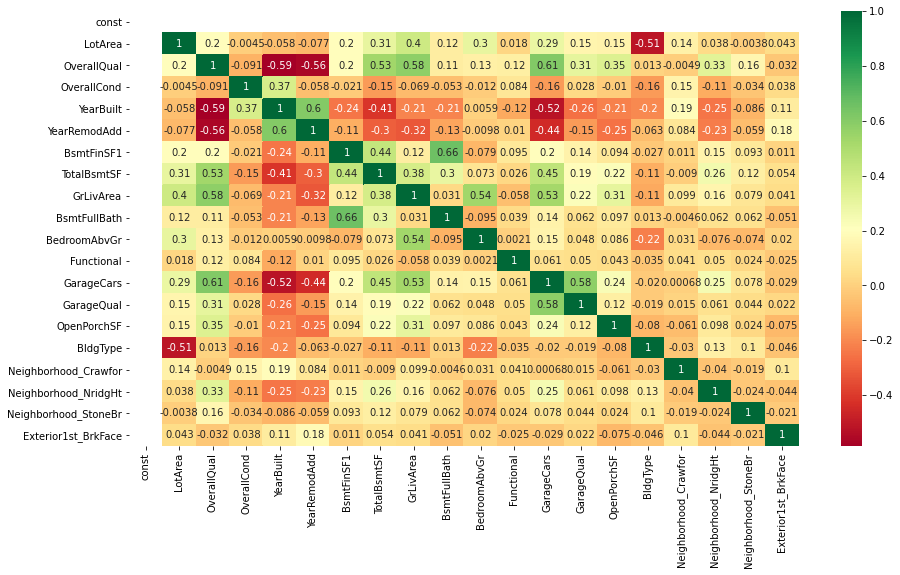

In [116]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_rfe.corr(),annot = True, cmap="RdYlGn")
plt.show()

### Inference

* Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only
* R2 is 0.919
* So we go ahead and make our predictions using this model only as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables. 
* Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model.

### Residual Analysis

In [117]:
y_train_count = lr12.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

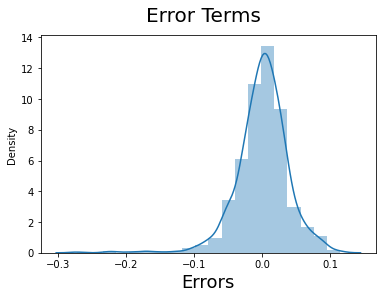

In [118]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Insights
From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

In [119]:
X_train_rfe = X_train_rfe.drop(['const'], axis = 1)

### Homoscedasticity

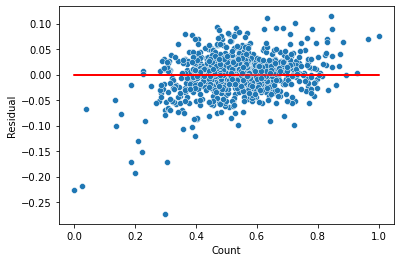

In [120]:
residual = y_train - y_train_count
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

#### No visible pattern observed from above plot for residuals

### Making Predictions Using the Final Model

In [121]:
# Now let's use the model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [122]:
# predictions

y_pred = lr12.predict(X_test_new)

Text(0, 0.5, 'y_pred')

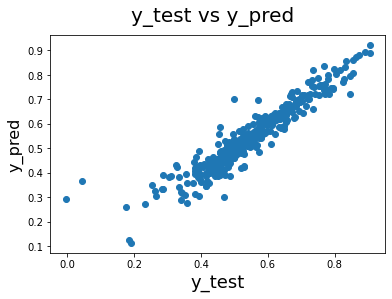

In [123]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

### Insights
We can observe that variance of the residuals (error terms) is constant across predictions. i.e error term does not vary much as the value of the predictor variable changes.

### Calculating R2 Score, RSS Value , RMSE Score for train and test data sets

In [124]:
y_pred_train = y_train_count
y_pred_test = y_pred

In [125]:
metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 score_train:", r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 score_test:", r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS score_train:", rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS score_test:", rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("RMSE score_train:", mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("RMSE score_test:", mse_test_lr)
metric.append(mse_test_lr**0.5)

R2 score_train: 0.9192106082167977
R2 score_test: 0.8891087411072276
RSS score_train: 1.3168578972697673
RSS score_test: 0.8026685282848466
RMSE score_train: 0.0014930361647049516
RMSE score_test: 0.0021234617150392766


## Step 5:  Regularization: Ridge and Lasso Regression
House prices, with a dataset used in simple linear regression, to perform ridge and lasso regression.

### Ridge Regression


In [126]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [127]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002997,0.000011,0.001590,0.000484,0.0001,{'alpha': 0.0001},-0.030439,-0.028409,-0.029725,-0.027045,-0.025636,-0.028251,0.001748,13,-0.026544,-0.027110,-0.026774,-0.027768,-0.028125,-0.027264,0.000596
1,0.002194,0.000399,0.001596,0.000489,0.001,{'alpha': 0.001},-0.030438,-0.028409,-0.029725,-0.027045,-0.025636,-0.028251,0.001748,12,-0.026544,-0.027110,-0.026773,-0.027768,-0.028125,-0.027264,0.000596
2,0.002792,0.000399,0.001197,0.000399,0.01,{'alpha': 0.01},-0.030432,-0.028408,-0.029718,-0.027047,-0.025630,-0.028247,0.001747,11,-0.026540,-0.027108,-0.026771,-0.027769,-0.028122,-0.027262,0.000597
3,0.002393,0.000488,0.001796,0.000399,0.05,{'alpha': 0.05},-0.030409,-0.028407,-0.029688,-0.027055,-0.025604,-0.028232,0.001743,9,-0.026526,-0.027103,-0.026760,-0.027771,-0.028113,-0.027255,0.000600
4,0.002790,0.000398,0.001796,0.000399,0.1,{'alpha': 0.1},-0.030380,-0.028414,-0.029659,-0.027065,-0.025572,-0.028218,0.001739,8,-0.026517,-0.027098,-0.026747,-0.027775,-0.028104,-0.027248,0.000603


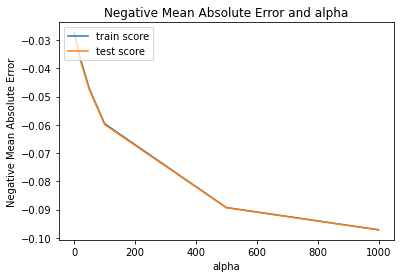

In [128]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [129]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.5}


In [130]:
#Fitting Ridge model for alpha = 0.5 and printing coefficients which have been penalised
alpha = 0.5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[ 0.06527213  0.20537227  0.10562739 -0.14263271 -0.03548013  0.06137705
  0.10558854  0.32216838  0.03504424 -0.04139992  0.06717927  0.06355171
  0.03780193  0.03739561 -0.03358742  0.04823262  0.03070214  0.04254058
  0.04164346]


In [131]:
X_test_new = X_test_new.drop(['const'], axis = 1)
X_test_new.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'BedroomAbvGr', 'Functional', 'GarageCars', 'GarageQual', 'OpenPorchSF', 'BldgType', 'Neighborhood_Crawfor', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Exterior1st_BrkFace'], dtype='object')

#### Calculating R2 Score, RSS Value , RMSE Score for train and test data sets

In [132]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 score_train: ', r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 score_test: ', r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS score_train: ', rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS score_test: ', rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('RMSE score_train: ', mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('RMSE score_test: ', mse_test_lr)
metric2.append(mse_test_lr**0.5)

R2 score_train:  0.9189589791720956
R2 score_test:  0.8890987900934681
RSS score_train:  1.320959422078711
RSS score_test:  0.8027405570962154
RMSE score_train:  0.0014976864195903753
RMSE score_test:  0.002123652267450305


In [133]:
ridgefeatures = pd.DataFrame({'Features':X_train_rfe.columns, 'Coeff':ridge.coef_.round(4)}).sort_values(by=['Coeff'], ascending=False)

In [134]:
ridgefeatures.head(10)

,Features,Coeff
7,GrLivArea,0.3222
1,OverallQual,0.2054
2,OverallCond,0.1056
6,TotalBsmtSF,0.1056
10,Functional,0.0672
0,LotArea,0.0653
11,GarageCars,0.0636
5,BsmtFinSF1,0.0614
15,Neighborhood_Crawfor,0.0482
17,Neighborhood_StoneBr,0.0425


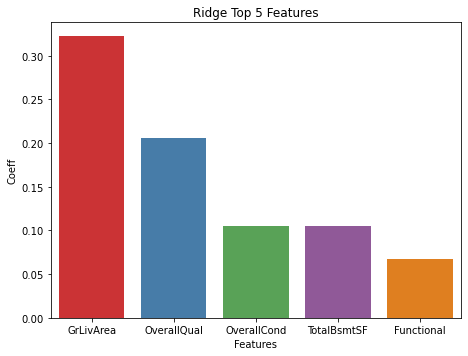

In [135]:
#Plotting top 5 features
plt.figure(figsize=(25,25))
plt.subplot(4,3,1)
plt.title('Ridge Top 5 Features')
sns.barplot(y = 'Coeff', x='Features', palette='Set1', data = ridgefeatures.head(5))
plt.show()

### Insights
##### The below given top 5 features are influences the prediction of 'SalePrice'
* GrLivArea: Above grade (ground) living area square feet
* OverallQual: Rates the overall material and finish of the house
* OverallCond: Rates the overall condition of the house
* TotalBsmtSF: Total square feet of basement area
* Functional: Home functionality (Assume typical unless deductions are warranted)


### Lasso Regression

In [136]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [137]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003187,0.000739,0.001996,0.000621,0.0001,{'alpha': 0.0001},-0.030405,-0.028457,-0.029662,-0.027105,-0.025713,-0.028268,0.001698,1,-0.026531,-0.027133,-0.026731,-0.027908,-0.028136,-0.027288,0.000634
1,0.002985,0.000631,0.001398,0.000485,0.001,{'alpha': 0.001},-0.031912,-0.031495,-0.032817,-0.031267,-0.028487,-0.031196,0.001454,2,-0.029210,-0.029727,-0.029664,-0.030698,-0.030856,-0.030031,0.000637
2,0.002593,0.000489,0.001197,0.000399,0.01,{'alpha': 0.01},-0.077656,-0.068911,-0.077942,-0.080138,-0.064892,-0.073908,0.005923,3,-0.073892,-0.072893,-0.073185,-0.074158,-0.071871,-0.073200,0.000807
3,0.001996,0.000004,0.001601,0.000491,0.05,{'alpha': 0.05},-0.106970,-0.106587,-0.112988,-0.111802,-0.097966,-0.107263,0.005298,4,-0.107316,-0.107447,-0.105825,-0.106130,-0.109548,-0.107253,0.001312
4,0.002396,0.000489,0.001396,0.000480,0.1,{'alpha': 0.1},-0.106970,-0.106587,-0.112988,-0.111802,-0.097966,-0.107263,0.005298,4,-0.107316,-0.107447,-0.105825,-0.106130,-0.109548,-0.107253,0.001312


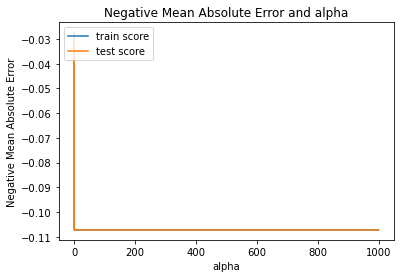

In [138]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [139]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [140]:
#Fitting Lasso model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 

Lasso(alpha=0.0001)

In [141]:
lasso.coef_

array([ 0.06164817,  0.21082186,  0.10568079, -0.14392218, -0.03361272,
        0.06248535,  0.10486806,  0.33083858,  0.03294907, -0.04059286,
        0.06369097,  0.0610338 ,  0.03478311,  0.02995388, -0.03294763,
        0.04550513,  0.02805927,  0.03428364,  0.03861676])

#### Calculating R2 Score, RSS Value , RMSE Score for train and test data sets

In [142]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 score_train: ', r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 score_test: ', r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS score_train: ', rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS score_test: ', rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('RMSE score_train: ', mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('RMSE score_test: ', mse_test_lr)
metric3.append(mse_test_lr**0.5)

R2 score_train:  0.9188836419870179
R2 score_test:  0.8900408865883725
RSS score_train:  1.3221874096268027
RSS score_test:  0.7959213432590053
RMSE score_train:  0.0014990786957219985
RMSE score_test:  0.002105612019203718


In [143]:
residual = y_test - y_pred_test

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

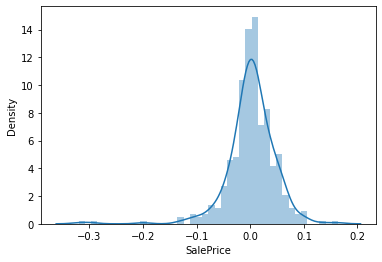

In [144]:
sns.distplot(residual)

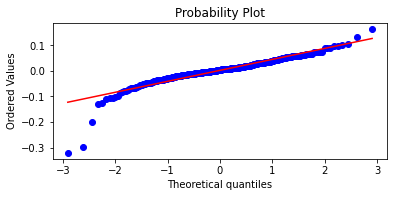

In [145]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

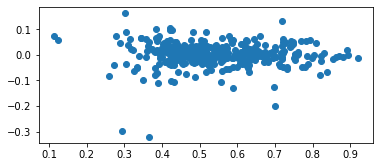

In [146]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, residual)

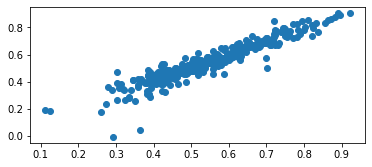

In [147]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, y_test)

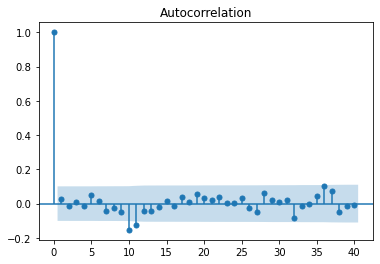

In [148]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(residual, lags=40 , alpha=0.05)
acf.show()

In [149]:
lasso_features = pd.DataFrame({'Features':X_train_rfe.columns, 'Coeff':lasso.coef_.round(4)}).sort_values(by=['Coeff'], ascending=False)

In [150]:
lasso_features.head(10)

,Features,Coeff
7,GrLivArea,0.3308
1,OverallQual,0.2108
2,OverallCond,0.1057
6,TotalBsmtSF,0.1049
10,Functional,0.0637
5,BsmtFinSF1,0.0625
0,LotArea,0.0616
11,GarageCars,0.0610
15,Neighborhood_Crawfor,0.0455
18,Exterior1st_BrkFace,0.0386


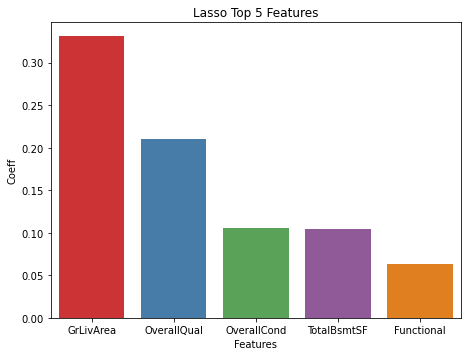

In [151]:
#Plotting top 5 features
plt.figure(figsize=(25,25))
plt.subplot(4,3,1)
plt.title('Lasso Top 5 Features')
sns.barplot(y = 'Coeff', x='Features', palette='Set1', data = lasso_features.head(5))
plt.show()

### Insights
##### The below given top 5 features are influences the prediction of 'SalePrice'
* GrLivArea: Above grade (ground) living area square feet
* OverallQual: Rates the overall material and finish of the house
* OverallCond: Rates the overall condition of the house
* TotalBsmtSF: Total square feet of basement area
* Functional: Home functionality (Assume typical unless deductions are warranted)

###  Creating a table which compares all the metrics of Linear , Lasso & Ridge Regression

In [152]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.919211,0.918959,0.918884
1,R2 Score (Test),0.889109,0.889099,0.890041
2,RSS (Train),1.316858,1.320959,1.322187
3,RSS (Test),0.802669,0.802741,0.795921
4,MSE (Train),0.038640,0.038700,0.038718
5,MSE (Test),0.046081,0.046083,0.045887


#### Observation: Changes in the coefficients after regularization

In [153]:
betas = pd.DataFrame(index=X_train_rfe.columns)

In [154]:
betas.rows = X_train_rfe.columns

In [155]:
betas['Linear'] = lr12.params
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [156]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
LotArea,0.063914,0.065272,0.061648
OverallQual,0.205470,0.205372,0.210822
OverallCond,0.111788,0.105627,0.105681
YearBuilt,-0.149167,-0.142633,-0.143922
YearRemodAdd,-0.031864,-0.035480,-0.033613
BsmtFinSF1,0.059267,0.061377,0.062485
TotalBsmtSF,0.105140,0.105589,0.104868
GrLivArea,0.343039,0.322168,0.330839
BsmtFullBath,0.036585,0.035044,0.032949
BedroomAbvGr,-0.054139,-0.041400,-0.040593


# Final Interpretations

### Optimum Values of lambda are: 
* Ridge : 0.5
* Lasso : 0.0001

 ### R2 Score Values are:
 
 
 
 
#### R2 Score (Train)		
* Ridge : 0.918959	    
* Lasso:  0.918884

#### R2 Score (Test)	     	
* Ridge :0.889099	     
* Lasso: 0.890041

### Final Top Features which are influencing in deciding house prices are : 

####  Top features selected through ridge and lasso regression

* LotArea
* OverallQual
* OverallCond
* YearBuilt
* YearRemodAdd
* BsmtFinSF1
* TotalBsmtSF
* GrLivArea
* BsmtFullBath
* BedroomAbvGr
* Functional
* GarageCars
* GarageQual
* OpenPorchSF
* BldgType
* Neighborhood_Crawfor
* Neighborhood_NridgHt
* Neighborhood_StoneBr
* Exterior1st_BrkFace

#### Ridge top 5 predictors with their coeffiecients are : 

* GrLivArea	0.3222
* OverallQual	0.2054
* OverallCond	0.1056
* TotalBsmtSF	0.1056
* Functional	0.0672

#### Lasso top 5 predictors with their Coefficients are: 
* GrLivArea	0.3308
* OverallQual	0.2108
* OverallCond	0.1057
* TotalBsmtSF	0.1049
* Functional	0.0637


### After creating model in both Ridge and Lasso we can see that the r2_scores are almost same for both of them but as lasso will penalize more on the dataset and can also has slightly better R-Square value on test data

# Subjective Question Answers

## Changes in the model if we choose double the value of alpha for both ridge and lasso? 

#### Ridge regression with 2*alpha

In [157]:
#Fitting Ridge model for alpha = 1 (2 x 0.5) and printing coefficients which have been penalised

alpha = 1
ridge2 = Ridge(alpha=alpha)

ridge2.fit(X_train_rfe, y_train)
print(ridge2.coef_)

[ 0.06620527  0.2040709   0.10025076 -0.1372845  -0.03866546  0.06296944
  0.10597434  0.30517116  0.0338396  -0.03128658  0.0648766   0.06826191
  0.03765439  0.03981286 -0.03278706  0.04842642  0.03128923  0.04255711
  0.04197373]


In [158]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge2.predict(X_train_rfe)
y_pred_test = ridge2.predict(X_test_new)

metric4 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 score_train: ', r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 score_test: ', r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS score_train: ', rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS score_test: ', rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('RMSE score_train: ', mse_train_lr)
metric4.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('RMSE score_test: ', mse_test_lr)
metric4.append(mse_test_lr**0.5)

R2 score_train:  0.9183474970180184
R2 score_test:  0.8886472477535035
RSS score_train:  1.33092651164162
RSS score_test:  0.8060089736431701
RMSE score_train:  0.0015089869746503627
RMSE score_test:  0.0021322988720718786


### Lasso regression with 2*alpha

In [159]:
#Fitting Lasso model for alpha = 0.0002 (2 x 0.0001) and printing coefficients which have been penalised

alpha =0.0002

lasso2 = Lasso(alpha=alpha)
        
lasso2.fit(X_train_rfe, y_train) 

Lasso(alpha=0.0002)

In [160]:
lasso2.coef_

array([ 0.05938207,  0.21615458,  0.09958613, -0.13869063, -0.03535441,
        0.06569741,  0.10458435,  0.31864312,  0.02931645, -0.02705113,
        0.05745053,  0.06429194,  0.03133903,  0.02562535, -0.03122156,
        0.04310283,  0.02603621,  0.02628572,  0.036083  ])

In [161]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso2.predict(X_train_rfe)
y_pred_test = lasso2.predict(X_test_new)

metric5 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 score_train: ', r2_train_lr)
metric5.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 score_test: ', r2_test_lr)
metric5.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS score_train: ', rss1_lr)
metric5.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS score_test: ', rss2_lr)
metric5.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('RMSE score_train: ', mse_train_lr)
metric5.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('RMSE score_test: ', mse_test_lr)
metric5.append(mse_test_lr**0.5)

R2 score_train:  0.9179030742276735
R2 score_test:  0.8902398514599755
RSS score_train:  1.3381705525766345
RSS score_test:  0.7944811680615688
RMSE score_train:  0.0015172001729893815
RMSE score_test:  0.002101802031908912


## Changes in co-efficients with double the value of alpha


In [162]:
gamma = pd.DataFrame(index=X_train_rfe.columns)

In [163]:
gamma.rows = X_train_rfe.columns

In [164]:
gamma['Ridge'] = ridge.coef_
gamma['Ridge2'] = ridge2.coef_
gamma['Lasso'] = lasso.coef_
gamma['Lasso2'] = lasso2.coef_

In [165]:
pd.set_option('display.max_rows', None)
gamma.head(68)

,Ridge,Ridge2,Lasso,Lasso2
LotArea,0.065272,0.066205,0.061648,0.059382
OverallQual,0.205372,0.204071,0.210822,0.216155
OverallCond,0.105627,0.100251,0.105681,0.099586
YearBuilt,-0.142633,-0.137284,-0.143922,-0.138691
YearRemodAdd,-0.035480,-0.038665,-0.033613,-0.035354
BsmtFinSF1,0.061377,0.062969,0.062485,0.065697
TotalBsmtSF,0.105589,0.105974,0.104868,0.104584
GrLivArea,0.322168,0.305171,0.330839,0.318643
BsmtFullBath,0.035044,0.033840,0.032949,0.029316
BedroomAbvGr,-0.041400,-0.031287,-0.040593,-0.027051


### Top Features we got after doubling the alpha values of Ridge and Lasso are:

In [166]:
#Ridge top Features with coefficients 
coefficients = pd.concat([pd.DataFrame(X_train_rfe.columns),pd.DataFrame(np.transpose(abs(ridge2.coef_)))],ignore_index=True, axis = 1)
coefficients.columns = ['feature', 'importance']
sorted_df = coefficients.sort_values(by='importance',ascending=False)
sorted_df[0:10]

,feature,importance
7,GrLivArea,0.305171
1,OverallQual,0.204071
3,YearBuilt,0.137284
6,TotalBsmtSF,0.105974
2,OverallCond,0.100251
11,GarageCars,0.068262
0,LotArea,0.066205
10,Functional,0.064877
5,BsmtFinSF1,0.062969
15,Neighborhood_Crawfor,0.048426


In [167]:
#Lasso top Features with coefficients 

coefficients = pd.concat([pd.DataFrame(X_train_rfe.columns),pd.DataFrame(np.transpose(abs(lasso2.coef_)))],ignore_index=True, axis = 1)
coefficients.columns = ['feature', 'importance']
sorted_df = coefficients.sort_values(by='importance',ascending=False)
sorted_df[0:10]

,feature,importance
7,GrLivArea,0.318643
1,OverallQual,0.216155
3,YearBuilt,0.138691
6,TotalBsmtSF,0.104584
2,OverallCond,0.099586
5,BsmtFinSF1,0.065697
11,GarageCars,0.064292
0,LotArea,0.059382
10,Functional,0.057451
15,Neighborhood_Crawfor,0.043103


In [168]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
rg_metric2 = pd.Series(metric4, name = 'Ridge Regression_2')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')
ls_metric2 = pd.Series(metric5, name = 'Lasso Regression_2')

final_metric = pd.concat([lr_metric, rg_metric, rg_metric2, ls_metric, ls_metric2], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Ridge Regression_2,Lasso Regression,Lasso Regression_2
0,R2 Score (Train),0.919211,0.918959,0.918347,0.918884,0.917903
1,R2 Score (Test),0.889109,0.889099,0.888647,0.890041,0.890240
2,RSS (Train),1.316858,1.320959,1.330927,1.322187,1.338171
3,RSS (Test),0.802669,0.802741,0.806009,0.795921,0.794481
4,MSE (Train),0.038640,0.038700,0.038846,0.038718,0.038951
5,MSE (Test),0.046081,0.046083,0.046177,0.045887,0.045845


### Question 3: Creating another model excluding the five most important predictor variables

In [169]:
top5variables = ['GrLivArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'OverallCond']


In [170]:
#dropping the top5 variables from the train set
X_train_lasso_modified = X_train_rfe.drop(['GrLivArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'OverallCond'], axis = 1)

In [171]:
X_train_lasso_modified.columns

Index(['LotArea', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFullBath', 'BedroomAbvGr', 'Functional', 'GarageCars', 'GarageQual', 'OpenPorchSF', 'BldgType', 'Neighborhood_Crawfor', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Exterior1st_BrkFace'], dtype='object')

In [172]:
#dropping the top5 variables from the test set
X_test_lasso_modified = X_test_new.drop(['GrLivArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'OverallCond'], axis = 1)

In [173]:
X_test_lasso_modified.columns

Index(['LotArea', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFullBath', 'BedroomAbvGr', 'Functional', 'GarageCars', 'GarageQual', 'OpenPorchSF', 'BldgType', 'Neighborhood_Crawfor', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Exterior1st_BrkFace'], dtype='object')

### Building the Lasso model after dropping the top 5 variables which was obtained from the first model

In [174]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_lasso_modified, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [175]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


#### We observed that the optimal value of alpha remained the same using GridSearch even after dropping the top5 predictor variables.

In [176]:
#Fitting Lasso model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_lasso_modified, y_train) 

Lasso(alpha=0.0001)

In [177]:
lasso.coef_

array([ 0.13295065, -0.13751676,  0.14443955,  0.        ,  0.13293067,
        0.08417501,  0.25920737,  0.0217548 ,  0.14955326, -0.01144647,
        0.05647456,  0.06986676,  0.11133091,  0.07410985])

In [178]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_lasso_modified)
y_pred_test = lasso.predict(X_test_lasso_modified)

metric6 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 score_train: ', r2_train_lr)
metric6.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 score_test: ', r2_test_lr)
metric6.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS score_train: ', rss1_lr)
metric6.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS score_test: ', rss2_lr)
metric6.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('RMSE score_train: ', mse_train_lr)
metric6.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('RMSE score_test: ', mse_test_lr)
metric6.append(mse_test_lr**0.5)

R2 score_train:  0.7636067070050138
R2 score_test:  0.6985360694390186
RSS score_train:  3.853183788998123
RSS score_test:  2.1820981373142248
RMSE score_train:  0.004368689103172475
RMSE score_test:  0.005772746395011177


In [179]:
# Printing the coefficients obtained from the model for the modified Lasso model

betas = pd.DataFrame(index=X_train_lasso_modified.columns)
betas.rows = X_train_lasso_modified.columns
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas

,Lasso
LotArea,0.132951
YearRemodAdd,-0.137517
BsmtFinSF1,0.144440
BsmtFullBath,0.000000
BedroomAbvGr,0.132931
Functional,0.084175
GarageCars,0.259207
GarageQual,0.021755
OpenPorchSF,0.149553
BldgType,-0.011446


In [180]:
#lasso_list
coefficients = pd.concat([pd.DataFrame(X_train_lasso_modified.columns),pd.DataFrame(np.transpose(abs(lasso.coef_)))],ignore_index=True, axis = 1)
coefficients.columns = ['feature', 'importance']
sorted_df = coefficients.sort_values(by='importance',ascending=False)
sorted_df[0:10]

,feature,importance
6,GarageCars,0.259207
8,OpenPorchSF,0.149553
2,BsmtFinSF1,0.144440
1,YearRemodAdd,0.137517
0,LotArea,0.132951
4,BedroomAbvGr,0.132931
12,Neighborhood_StoneBr,0.111331
5,Functional,0.084175
13,Exterior1st_BrkFace,0.074110
11,Neighborhood_NridgHt,0.069867


### Top 5 predictor variables are :

*	GarageCars	0.259207
*	OpenPorchSF	0.149553
*	BsmtFinSF1	0.144440
*	YearRemodAdd	0.137517
*	LotArea	0.132951

In [181]:
model_parameters = list(lasso.coef_)

model_parameters = list(lasso.coef_)
lasso_list = list(zip(cols, model_parameters))

In [182]:
final_lasso_new_pred =[]
for i in range(len(lasso_list)):
    if(lasso_list[i][1]!=0):
        final_lasso_new_pred.append(lasso_list[i][0])
print('Number of predictors selected by double the optimal alpha for lasso are:{0}'.format(len(final_lasso_new_pred)))

Number of predictors selected by double the optimal alpha for lasso are:13
